<a href="https://colab.research.google.com/github/IqbalLx/Hanacaraka-AI/blob/master/Hanacaraka%20AI%20-%20notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing the dataset

Here we directly download the ```Javanese Script Dataset``` from [Kaggle](https://www.kaggle.com/phiard/aksara-jawa) using Kaggle API

In [0]:
from google.colab import files
files.upload()                                                                   # Here we upload our Kaggle API key

In [0]:
!pip install -q kaggle                                                           # Installing required kaggle library
!mkdir ~/.kaggle                                                                 # Create new Kaggle directory to store our API key in root
!cp kaggle.json ~/.kaggle                                                        # Copy the API to root folder
!chmod 600 ~/.kaggle/kaggle.json                                                 # Give access
!kaggle datasets download -d phiard/aksara-jawa                                  # Downloading the dataset

In [0]:
import zipfile, os

DATASET = 'aksara-jawa.zip'                                                      # Process to extract dataset zip file
zip_ref = zipfile.ZipFile(DATASET)
zip_ref.extractall()
zip_ref.close()

In [0]:
os.listdir()                                                                     # Just to show what's inside our current dir
                                                                                 # Also can do this from side bar in colab

['.config',
 'aksara-jawa.zip',
 'dataset',
 'kaggle.json',
 'newdatasetaug',
 'sample_data']

The dataset is contain 2 main folders, ``dataset`` and ``newdatasetaug``. We are going to combine that 2 folders.

In [0]:
os.listdir('dataset')

['training', 'newtraining', 'testing', 'newtesting', 'prediction']

Inside dataset folder there are 4 sub-folders, we can use ``training`` and ``newtraining`` to train our model and ``testing`` and ``newtesting`` to validate our model. And last ``prediction`` to testing our model.

# Overview of the Dataset

In [0]:
print(len(os.listdir('dataset/training/ha')))
print(len(os.listdir('dataset/training/na')))
print(len(os.listdir('dataset/training/ca')))

27
28
28


In [0]:
print(len(os.listdir('dataset/newtraining/ha')))
print(len(os.listdir('dataset/newtraining/na')))
print(len(os.listdir('dataset/newtraining/ca')))

11
12
12


We have arround 40 training data for each alphabet, which quite small. We hope this still can produce a great model 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plt_image

plt.style.use('seaborn')

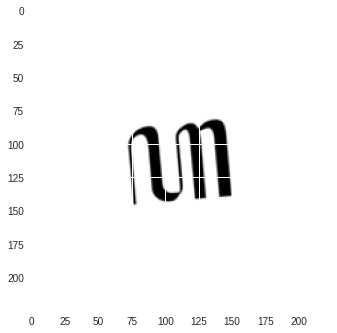

(224, 224, 3)


In [0]:
preview = plt_image.imread('dataset/training/ha/ha.3.jpg')
plt.imshow(preview)
plt.show()
print(preview.shape)

Here we can see our dataset is 224x224 with RGB color profile, but in fact the image is only black and white, so we need to change it to grayscale later. For now, let's plot some other more!

### Preview from ``dataset`` folder

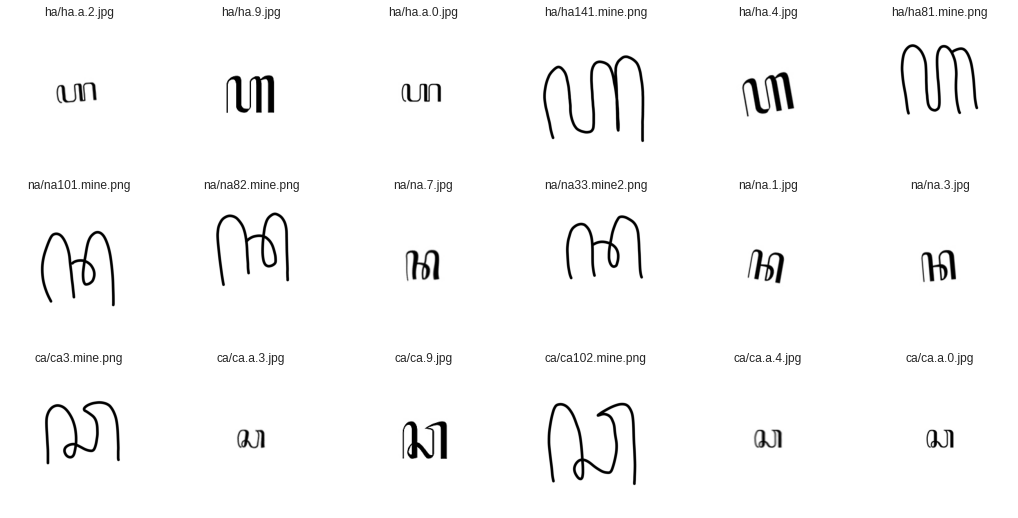

In [0]:
TOTAL = 6                                                                        # Total of preview images
index = np.random.randint(20)                                                    # To randomize the index photo

plt.figure(figsize=(3*TOTAL, 9))

list_ha = [os.path.join('dataset/training/ha', name) for name in os.listdir('dataset/training/ha')[index:index+TOTAL]]
list_na = [os.path.join('dataset/training/na', name) for name in os.listdir('dataset/training/na')[index:index+TOTAL]]
list_ca = [os.path.join('dataset/training/ca', name) for name in os.listdir('dataset/training/ca')[index:index+TOTAL]]

for i, path in enumerate(list_ha+list_na+list_ca):
  plt.subplot(3, TOTAL, i+1)
  plt.axis('off')

  plt.title(path.replace('dataset/training/', ''))
  img = plt_image.imread(path)
  plt.imshow(img)

### Preview from ``newdatasetaug`` folder

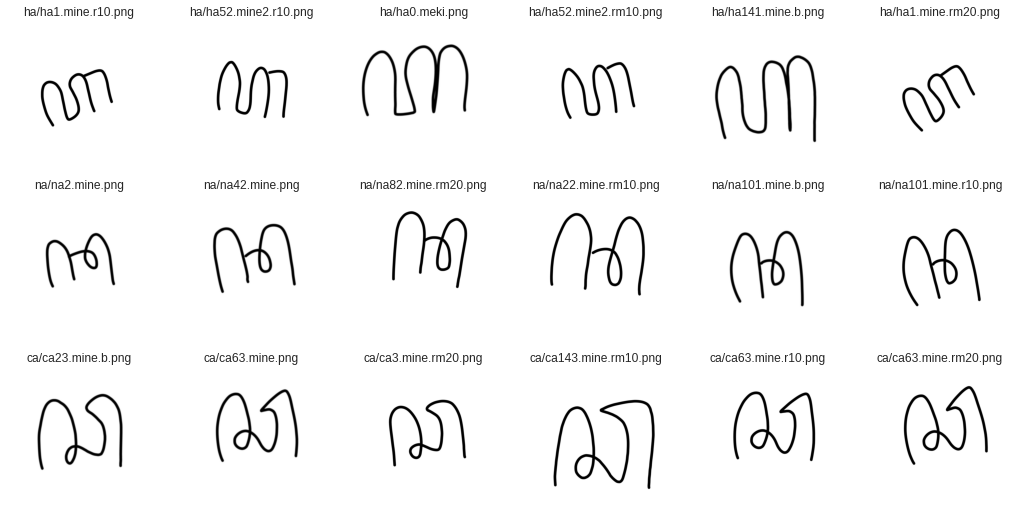

In [0]:
TOTAL = 6                                                                        # Total of preview images
index = np.random.randint(20)                                                    # To randomize the index photo

plt.figure(figsize=(3*TOTAL, 9))

list_ha = [os.path.join('newdatasetaug/newtraining/ha', name) for name in os.listdir('newdatasetaug/newtraining/ha')[index:index+TOTAL]]
list_na = [os.path.join('newdatasetaug/newtraining/na', name) for name in os.listdir('newdatasetaug/newtraining/na')[index:index+TOTAL]]
list_ca = [os.path.join('newdatasetaug/newtraining/ca', name) for name in os.listdir('newdatasetaug/newtraining/ca')[index:index+TOTAL]]

for i, path in enumerate(list_ha+list_na+list_ca):
  plt.subplot(3, TOTAL, i+1)
  plt.axis('off')

  plt.title(path.replace('newdatasetaug/newtraining/', ''))
  img = plt_image.imread(path)
  plt.imshow(img)

We can clearly see that the dataset is has quite large variance, form the size to the font type itself. It's good!

Note: When I running that previews code,I got some invalid PNG headers error for some image, let's look if it crash our model when training, if not maybe we can ignore it

#Combining dataset

Here we try to combine ``training, testing`` and ``newtraining, newtesting`` sub-folders from ``dataset`` folder and then append it with and ``newdatasetaug``

In [0]:
#@title Helper function to copy files
import shutil

sub_folder_name = os.listdir('dataset/training')                                  # List all sub-folders, aka 'ha', 'na', ...
sub_folder_name.remove('aturan.txt')                                              # Deleting unwanted items

def copy(SOURCE, DEST):
  for sub_folder in sub_folder_name:
    images = os.listdir(os.path.join(SOURCE, sub_folder))
    for image in images:
      path_source = f"{SOURCE}/{sub_folder}/{image}"
      path_dest = f"{DEST}/{sub_folder}/{image}"
      shutil.copyfile(path_source, path_dest)

  return print('200 OK')

In [0]:
copy('dataset/newtraining', 'dataset/training')
copy('dataset/newtesting', 'dataset/testing')

copy('newdatasetaug/newtraining', 'dataset/training')
copy('newdatasetaug/newtesting', 'dataset/testing')

200 OK
200 OK
200 OK
200 OK


Manually doing copy for prediction file because the structure is different

In [0]:
pred_source = 'newdatasetaug/prediction'
pred_dest = 'dataset/prediction'

pred_source_images = os.listdir(pred_source)
for image in pred_source_images:
  path_source = os.path.join(pred_source, image)
  path_dest = os.path.join(pred_dest, image)

  shutil.copyfile(path_source, path_dest)

print('200 OK')

200 OK


In [0]:
assert False # To stop if we run all from above
             # Because below we gonna deal with model, so better stop
             # here everytime we doing restart kernel if needed

AssertionError: ignored

# Image Data Generator

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [0]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   width_shift_range=2,
                                   height_shift_range=2)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    'dataset/training',
    target_size=(224, 224),
    batch_size=32,
    color_mode='grayscale',
    class_mode = 'categorical'
)

val_generator = validation_datagen.flow_from_directory(
    'dataset/testing',
    target_size=(224, 224),
    batch_size=32,
    color_mode='grayscale',
    class_mode = 'categorical'
)

Found 1762 images belonging to 20 classes.
Found 979 images belonging to 20 classes.


# Build baseline model

This dataset is quite similar with mnist dataset that we used for training in Coursera, so we gonna re-create that basic CNN model and use it for our baseline model

In [0]:
#@title Helper function for plotting Accuracy and Loss
def plot(hist):
  history = base_hist.history
  history['epoch'] = base_hist.epoch

  plt.figure(figsize=(12, 5))

  plt.subplot(121)
  plt.plot(history['epoch'], history['loss'], label='Loss')
  plt.plot(history['epoch'], history['val_loss'], label='Val Loss', color='orange')
  plt.legend()

  plt.subplot(122)
  plt.plot(history['epoch'], history['accuracy'], label='Acc')
  plt.plot(history['epoch'], history['val_accuracy'], label='Val Acc', color='orange')
  plt.legend()

  return plt.show()

In [0]:
#@title Helper function for testing model
from tensorflow.keras.preprocessing import image as keras_image

classes = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma',
           'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

def test(model):
  test_images_paths = os.listdir('dataset/prediction')
  for path in test_images_paths:
    image_path = os.path.join('dataset/prediction', path)

    image = keras_image.load_img(image_path,
                                 color_mode='grayscale',
                                 target_size=(224, 224))
    x = keras_image.img_to_array(image)
    x = np.expand_dims(x, axis=0)

    test_image = np.vstack([x])
    result = model.predict(test_image, batch_size=8)

    print(image_path)
    print(classes[np.argmax(result)])

    preview = plt_image.imread(image_path)
    plt.imshow(preview)
    plt.show()
  return print('Prediction Done')

In [0]:
#I decide to write my own callback class for early stopping
#To added some flexibility
#Early stop if accuracy already hit more than 80% 
#and didnt significantly increased after that

class early_stop(tf.keras.callbacks.Callback):
  def __init__(self, threshold=0.8, patience=3, significance_val=0.001):
    super(early_stop, self).__init__()

    self.threshold = threshold                                                    #Minimum accuracy
    self.patience = patience                                                      #Limit epoch to wait if accuracy no longer increased
    self.significance_val = significance_val                                      #Significant value to mark improvement in accuracy
    self.best_weights = None                                                      #Best weights record
    self.is_reach_threshold = False                                               #Track if already reach threshold value or not
    self.best_epoch = 0                                                           #Track best epoch that produce best weights

  def on_train_begin(self, logs=None):
    self.previous_acc = 0                                                         #Track previous accuracy
    self.wait = 0                                                                 #Track epoch when accuracy no longer increased

  def on_epoch_end(self, epoch, logs={}):
    self.current_acc = logs.get('val_accuracy')                                   #Current epoch's validation accuracy

    if self.is_reach_threshold:
      if self.current_acc - self.previous_acc > self.significance_val:
        self.wait = 0
        self.previous_acc = self.current_acc
        self.best_weights = self.model.get_weights()
        self.best_epoch = epoch
        print('\n[INFO] Best weights updated!')
      else:
        self.wait += 1
        print(f'\n[INFO] Current wait = {self.wait}')
        if self.wait >= self.patience:
          self.model.stop_training = True
          print('\n[INFO] Validation Accuracy didnt increased after 3 epochs, training stopped...')
          self.model.set_weights(self.best_weights)
          print(f'\n[INFO] Restoring best weights from epoch {self.best_epoch + 1} val_acc')
    
    if self.current_acc > self.threshold and not self.is_reach_threshold:
      self.is_reach_threshold = True
      self.previous_acc = self.current_acc
      self.best_weights = self.model.get_weights()
      self.best_epoch = epoch
      print('\n[INFO] Threshold reached! Best weights start here...')

early_stop = early_stop()

In [0]:
base_model = Sequential([Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 1)),
                         MaxPool2D(2, 2),
                         Conv2D(32, (3, 3), activation='relu'),
                         MaxPool2D(2, 2),
                         Conv2D(32, (3, 3), activation='relu'),
                         MaxPool2D(2, 2),
                         Conv2D(64, (3, 3), activation='relu'),
                         MaxPool2D(2, 2),
                         Conv2D(64, (3, 3), activation='relu'),
                         MaxPool2D(2, 2),
                         Flatten(),
                         Dropout(0.5),
                         Dense(128, activation='relu'),
                         Dense(20, activation='softmax')])

base_model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        1

In [0]:
base_hist = base_model.fit(
    train_generator,
    epochs = 100,
    steps_per_epoch = int(1762/32),
    validation_data = val_generator,
    validation_steps= int(979/32),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
55/55 [==============================] - 41s 754ms/step - loss: 2.9996 - accuracy: 0.0405 - val_loss: 2.9933 - val_accuracy: 0.0562
Epoch 2/100
55/55 [==============================] - 40s 735ms/step - loss: 2.8974 - accuracy: 0.1145 - val_loss: 2.3997 - val_accuracy: 0.2927
Epoch 3/100
55/55 [==============================] - 41s 739ms/step - loss: 2.2484 - accuracy: 0.3110 - val_loss: 1.9096 - val_accuracy: 0.4458
Epoch 4/100
55/55 [==============================] - 41s 744ms/step - loss: 1.7765 - accuracy: 0.4491 - val_loss: 1.6475 - val_accuracy: 0.5302
Epoch 5/100
55/55 [==============================] - 41s 746ms/step - loss: 1.4668 - accuracy: 0.5382 - val_loss: 1.5438 - val_accuracy: 0.5917
Epoch 6/100
55/55 [==============================] - 41s 743ms/step - loss: 1.1957 - accuracy: 0.6214 - val_loss: 1.5796 - val_accuracy: 0.5906
Epoch 7/100
55/55 [==============================] - 41s 737ms/step - loss: 1.0548 - accuracy: 0.6636 - val_loss: 1.1451 - val_accuracy:

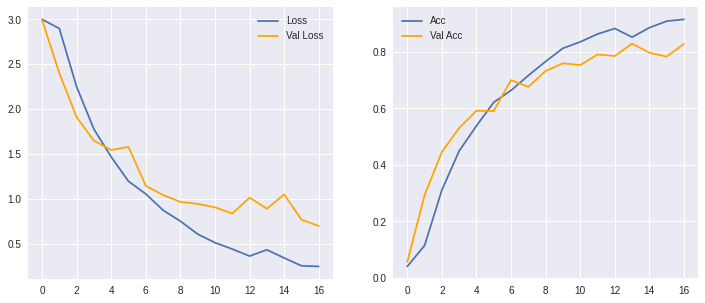

In [0]:
plot(base_hist)

dataset/prediction/ma.0.jpg
ma


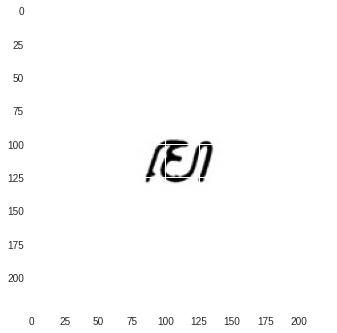

dataset/prediction/ba49.mine2.png
ba


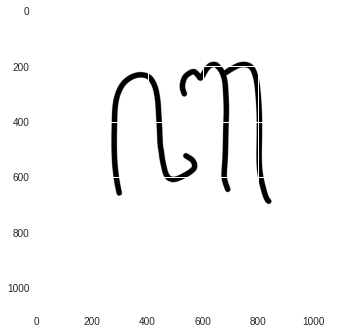

dataset/prediction/ma.1.jpg
ma


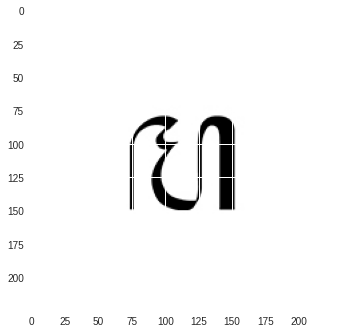

dataset/prediction/ra164.pred.png
ra


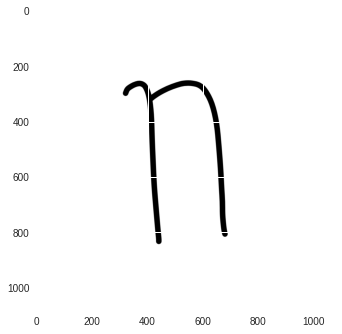

dataset/prediction/nga220.pred.png
nga


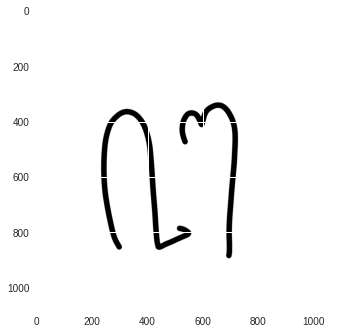

Prediction Done


In [0]:
test(base_model)

In [0]:
tf.keras.models.save_model(base_model, 'base_model.h5')

Our base model is pretty good, it correctly predict all 5 testing datas.
I do some testing using canvas and draw javanese script using mouse, I found it's correct for some letter, but fail on another letter which has similarities with other letter.

Lets see what can we improve here

#Build Improved Model